In [51]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

#create dataframe
churn = pd.read_csv("BankChurners.csv",usecols = list(range(21)))



In [52]:
#to print the first few rows
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [53]:
churn.shape
#10127 customers

(10127, 21)

In [54]:
#first check for missing values in the columns
churn.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [55]:
#to return the number of total missing values sum the series of column missing value totals above
int(churn.isna().sum().sum())

0

In [56]:
#look at percent attrition
churn['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

In [57]:
#replace attrited customer with 1 and existing customer with 0
churn['Attrition_Flag']=churn['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
# Convert to numeric, with error handling
churn['Attrition_Flag'] = pd.to_numeric(churn['Attrition_Flag'])
# errors='coerce' converts invalid values to NaN
churn['Attrition_Flag']

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [58]:
gender_marital=churn[['Attrition_Flag','Gender','Marital_Status']].groupby(['Gender','Marital_Status']).mean().round(2)
gender_marital.sort_values(by='Attrition_Flag', ascending=False)
#return relative frequency

Attrition_Flag
Gender Marital_Status                
F      Unknown                   0.18
       Single                    0.18
       Married                   0.17
       Divorced                  0.17
M      Unknown                   0.16
       Single                    0.16
       Divorced                  0.15
       Married                   0.13

In [59]:
gender=churn[['Attrition_Flag','Gender']].groupby(['Gender']).mean().round(2)
gender.sort_values(by='Attrition_Flag', ascending=False)
#females may be slightly more likely to attrite

,Attrition_Flag
Gender,
F,0.17
M,0.15


In [60]:
Age_dependents=churn[['Attrition_Flag','Customer_Age','Dependent_count']].groupby(['Attrition_Flag']).mean().round(2)
Age_dependents
#doesn't seems to be a difference with customer_age and dependent_count


,Customer_Age,Dependent_count
Attrition_Flag,,
0,46.26,2.34
1,46.66,2.40


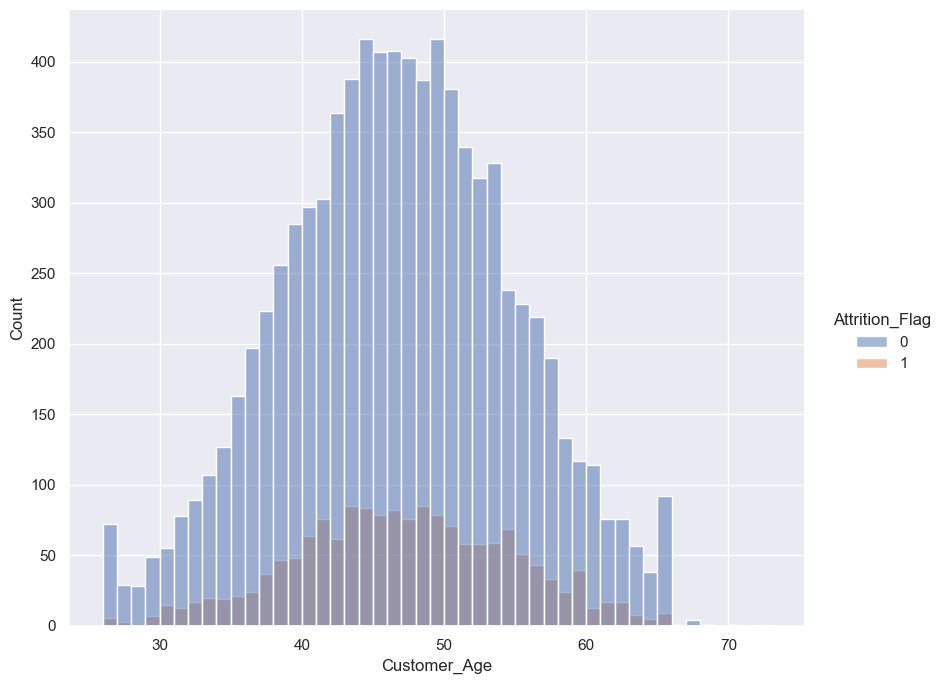

In [61]:
sns.displot(data=churn, kind='hist',x='Customer_Age', hue = 'Attrition_Flag',height=7, aspect=1.2,stat="count")
#distributions of age look similar for attrited and not attrited customers

<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

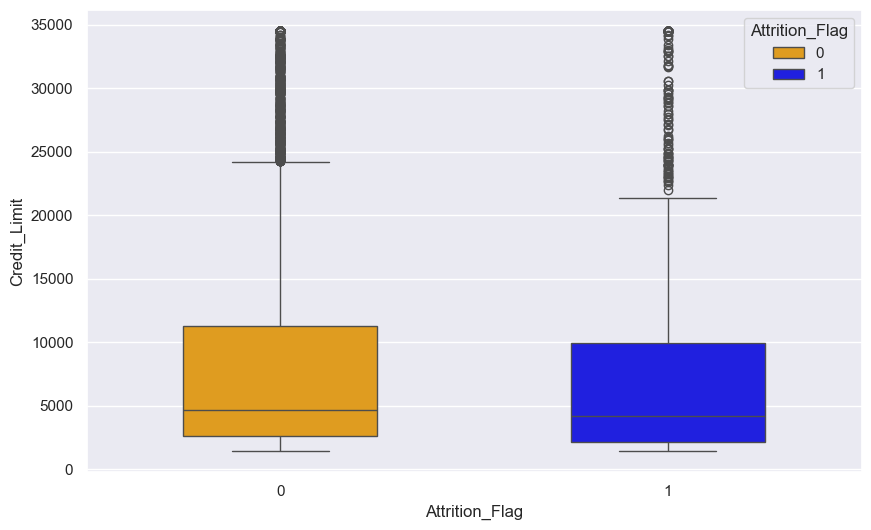

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(data=churn,y='Credit_Limit',x='Attrition_Flag',width=0.5,hue='Attrition_Flag',palette=['orange','blue'])
#distributions look similar

In [ ]:
months_inactive=churn[['Attrition_Flag','Months_Inactive_12_mon']].groupby(['Months_Inactive_12_mon']).agg(['mean','count']).round(2)
months_inactive